In [70]:
from scipy import signal
import matplotlib.pyplot as plt
import matplotlib.collections as collections
# plt.rcParams.update(plt.rcParamsDefault)
import numpy as np
import csv

## 1. Take measurements of the bead with VNA
 
* Callibrate the VNA with the testing fixture
* Setup the bead in the testing fixture
* Notice that there 3 ways of doing it - see https://www.youtube.com/watch?v=1UbEz73FGCU
* Run nano-VNA, record measurements into *.s1p file (Touchstone file format)

$ D_{i} = 1 + R_{real_{i}}^2 + R_{img_{i}}^2 - 2*R_{real_{i}} $


$R_{i}=
\begin{dcases}
    Z_0*\frac{1 - R_{real_{i}}^2 - R_{img_{i}}^2}{D_{i}}, & \text{if } D_{i}\neq 0 \\
    \infty, & \text{otherwise}
\end{dcases}
$

$
X_{i} =
\begin{dcases}
    2*Z_0*\frac{R_{img_{i}}}{D_{i}}, & \text{if } D_{i}\neq 0 \\
    0, & \text{otherwise}
 \end{dcases}
$

In [99]:
path = './smd-bead.s1p'
with open(path, 'r') as f:
    reader = csv.reader(f, delimiter=' ')
    headers = next(reader)
    rawData = np.array(list(reader)).astype(float)
    #data[0] is frequency in Hz
    #data[1] is Rreal
    #data[2] is Rimg
    # Z0 = 50 Ohm
Z0 = 50
F = []
D = []
R = []
X = []

#TODO: np.array
for measurement in rawData:
    d = 1 + measurement[1]**2+measurement[2]**2-2*measurement[1]
    r = ((1 - measurement[1]**2 - measurement[2]**2)*Z0)/d
    x = 2*Z0*measurement[2]/d
    F.append(measurement[0]/1000000)
    D.append(d)
    R.append(r)
    X.append(x)


<Figure size 640x480 with 0 Axes>

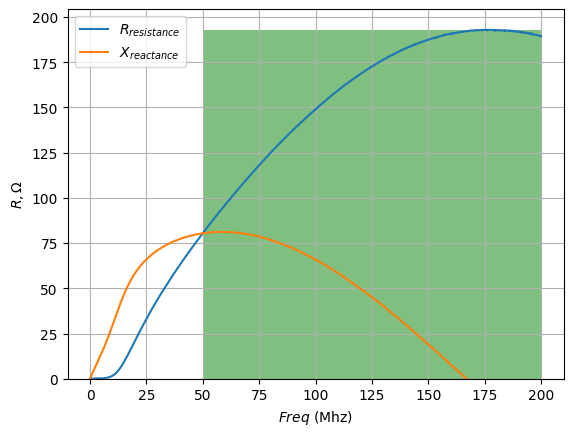

In [110]:
plt.figure()

fig, ax = plt.subplots()
ax.plot(F, R, label="$ R_{resistance} $")
ax.plot(F, X, label="$X_{reactance}$")

FF = np.asarray(F)
RR = np.asarray(R)
XX = np.asarray(X)

collection = collections.BrokenBarHCollection.span_where(
    FF, ymin=min(RR), ymax=max(RR), where= RR > abs(XX), facecolor='green', alpha=0.5)
ax.add_collection(collection)


plt.ylabel(r"$R, \Omega $")
plt.xlabel("$Freq$ (Mhz)")
plt.grid(True)
plt.ylim(0,);
plt.legend()
plt.show()


Ferrite bead response characteristics

Ferrite beads are categorized by three response regions: inductive,
resistive, and capacitive. These regions can be determined by
looking at a ZRX plot, where Z is the impedance, R is the
resistance, and X is the reactance of the bead. To reduce high
frequency noise, the bead must be in the resistive region; this is
especially desirable for electromagnetic interference (EMI) filtering
applications. The component acts like a resistor, which impedes
the high frequency noise and dissipates it as heat. The resistive
region occurs after the bead crossover frequency (X = R) and up
to the point (shown in Figure 2) where the bead becomes
capacitive. This capacitive point occurs at the frequency where
the absolute value of capacitive reactance is equivalent to R.

<img src="bead-characteristics.png" width="400">